In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

In [3]:
def append_new_line(file_name, text_to_append):
    """Append given text as a new line at the end of file"""
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)


In [4]:
#details=('name, ra (deg) , dec(deg) , alt(deg) , az(deg) , daytime, site ,div ,fov(deg2), tracking')
#append_new_line(f'plots/fov_evolution.txt', details)


## Select the CTA location and time of observation

In [5]:
time='2020-07-08T02:20'
div=0.0022
name='pollux'
cut=0

In [6]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-07-08T02:20:00.000


<AltAz Frame (obstime=2020-07-08T02:20:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [7]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [8]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [9]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-07-08T02:20:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (7.34462095, -32.86953383)>



In [10]:
cta.source.alt.deg

-32.869533832969694

## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


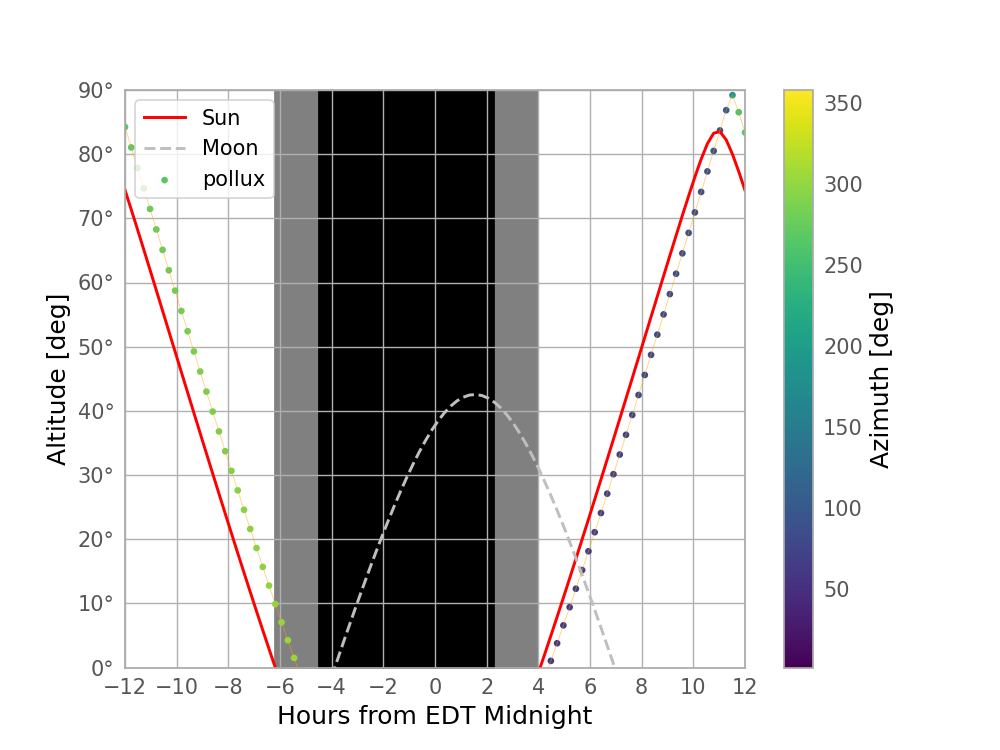

In [11]:
cta.navigation_plot(label = name)
plt.savefig(f'navigation_{name}_{time}.png')
#plt.show()

## Load array and pointing to a source

In [12]:
cta.site

'Roque de los Muchachos'

In [13]:
if cta.site == "Roque de los Muchachos":
    config_file = "./config/layout-3AL4M15-5.txt" 
elif cta.site =="Paranal":
    config_file = "./config/layout_paranal_HB9.txt"

In [14]:
array =  LoadConfig( config_file, frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-70.04,-7.23,54.0,7.345,-32.870,122.870,28.000,2.150,14.536,0.833,-0.107,-0.543,34.63
2,-34.37,110.98,43.0,7.345,-32.870,122.870,28.000,2.150,14.536,0.833,-0.107,-0.543,94.18
3,76.18,95.34,39.7,7.345,-32.870,122.870,28.000,2.150,14.536,0.833,-0.107,-0.543,166.98
4,31.81,-19.7,43.0,7.345,-32.870,122.870,28.000,2.150,14.536,0.833,-0.107,-0.543,117.20
5,-210.65,50.51,61.3,7.345,-32.870,122.870,16.000,3.850,46.707,0.833,-0.107,-0.543,137.60
6,-179.06,223.02,42.1,7.345,-32.870,122.870,16.000,3.850,46.707,0.833,-0.107,-0.543,222.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-196.4,-290.24,88.1,7.345,-32.870,122.870,16.000,3.850,46.707,0.833,-0.107,-0.543,341.27


## Activate the divergent pointing mode

In [15]:
array.divergent_pointing(div) #0.01453   0.0043

In [16]:
array.hFoV()

<Quantity 113.77370308 deg2>

In [17]:
array.hFoV(m_cut=cut)


<Quantity 113.77370308 deg2>

<IPython.core.display.Javascript object>


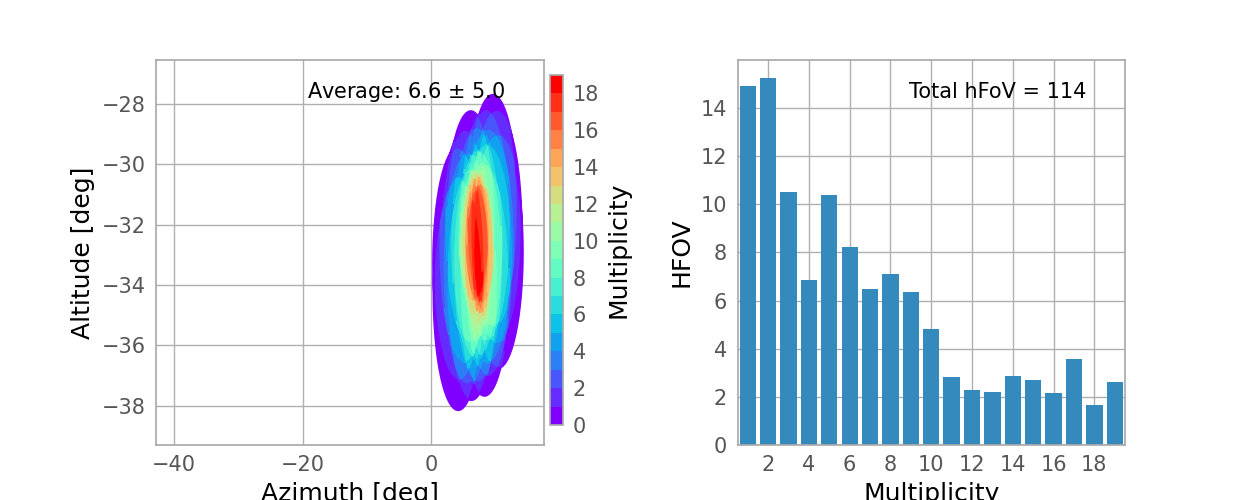

In [18]:
array.multiplicity_plot()

In [19]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [20]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)
initial_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.03235819, 28.06634785), (117.09008985, 28.19918474),
     (117.00682584, 28.63349196), (115.98858882, 28.4190845 ),
     (116.45954507, 27.53180838), (118.0138905 , 27.61390157),
     (118.28425217, 28.38293131), (117.34731614, 28.92558653),
     (115.05755138, 28.72077366), (114.8405929 , 27.97096476),
     (114.91957026, 27.51098965), (119.40722088, 27.87232251),
     (113.47100109, 28.40740306), (113.44644505, 27.58345827),
     (116.53432366, 28.30027094), (119.43131094, 26.85956238),
     (117.49800415, 27.03486941), (115.59391438, 26.96217071),
     (113.9601233 , 29.05391686)]>

In [21]:
pointing_start_altaz=array.get_pointing_coord(icrs=False)
pointing_start_altaz

<SkyCoord (AltAz: obstime=2020-07-08T02:20:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 7.64717432, -32.79532341), ( 6.52658657, -32.77965728),
     ( 6.5534333 , -32.33979496), ( 7.63633855, -32.4405987 ),
     ( 7.28336276, -33.37465296), ( 5.632209  , -33.44889736),
     ( 5.26045494, -32.70634864), ( 6.16406556, -32.08317171),
     ( 8.54237624, -32.02557677), ( 8.90159218, -32.73737706),
     ( 8.90435271, -33.20263214), ( 4.13436293, -33.29767218),
     (10.22512029, -32.10528993), (10.42611572, -32.91190973),
     ( 7.08978135, -32.62062569), ( 4.19832892, -34.30928036),
     ( 6.25260116, -33.97713843), ( 8.29150031, -33.83481263),
     ( 9.59567194, -31.543228  )]>

In [22]:
star_altaz=star.transform_to(cta.altaz)

In [23]:
cta.observer.name


'CTA North'

In [24]:
details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{array.hFoV().value},{array.hFoV(return_multiplicity=True)[1]}initial_point')
append_new_line(f'plots/fov_evolution.txt', details)


## Shifting the observation time and check how it change

In [25]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 20*u.min, verbose=True)


Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-07-08T02:20:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-07-08T02:40:00.000


In [26]:
cta.t_obs.value

'2020-07-08T02:20:00.000'

In [27]:
cta.source.alt.deg

-32.869533832969694

In [28]:
new_tracking_pos=array.get_pointing_coord(icrs=True)
new_tracking_pos

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.03559192, 28.05565805), (117.09933195, 28.22705192),
     (117.05990564, 28.65926661), (116.03742293, 28.40775179),
     (116.39841961, 27.5352926 ), (117.95934801, 27.67399735),
     (118.31737752, 28.45471443), (117.44592554, 28.96458268),
     (115.15760699, 28.67691203), (114.86321482, 27.91776797),
     (114.87389832, 27.45912415), (119.38755543, 27.98380469),
     (113.54405273, 28.30586586), (113.42952334, 27.47934334),
     (116.56585056, 28.30836641), (119.34584959, 26.96920799),
     (117.36602806, 27.07465762), (115.46097728, 26.93279821),
     (114.10138251, 28.971369  )]>

In [29]:
new_frame=array.frame.altaz
new_frame

<AltAz Frame (obstime=2020-07-08T02:40:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [30]:
star.transform_to(new_frame).alt.deg


-32.11103003624055

In [31]:
array.frame.t_obs.value

'2020-07-08T02:40:00.000'

In [32]:
pointing_start_altaz

<SkyCoord (AltAz: obstime=2020-07-08T02:20:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 7.64717432, -32.79532341), ( 6.52658657, -32.77965728),
     ( 6.5534333 , -32.33979496), ( 7.63633855, -32.4405987 ),
     ( 7.28336276, -33.37465296), ( 5.632209  , -33.44889736),
     ( 5.26045494, -32.70634864), ( 6.16406556, -32.08317171),
     ( 8.54237624, -32.02557677), ( 8.90159218, -32.73737706),
     ( 8.90435271, -33.20263214), ( 4.13436293, -33.29767218),
     (10.22512029, -32.10528993), (10.42611572, -32.91190973),
     ( 7.08978135, -32.62062569), ( 4.19832892, -34.30928036),
     ( 6.25260116, -33.97713843), ( 8.29150031, -33.83481263),
     ( 9.59567194, -31.543228  )]>

In [33]:
final_pointing = initial_pointing_dir.transform_to(new_frame)
final_pointing

<SkyCoord (AltAz: obstime=2020-07-08T02:40:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(12.80757611, -32.01439398), (11.69893023, -32.08306848),
     (11.67916329, -31.64294469), (12.75966037, -31.6618945 ),
     (12.50978442, -32.61871496), (10.88625037, -32.81706405),
     (10.43917681, -32.10564312), (11.26737188, -31.41670189),
     (13.61113285, -31.18058862), (14.03954415, -31.86273115),
     (14.09117175, -32.32593158), ( 9.38798327, -32.77984608),
     (15.27927456, -31.13447573), (15.56071871, -31.92302919),
     (12.23866377, -31.88227643), ( 9.56173712, -33.78238175),
     (11.55661374, -33.29631115), (13.55405408, -33.00139239),
     (14.60115093, -30.62143012)]>

In [34]:
final_pointing[:].alt.deg

array([-32.01439398, -32.08306848, -31.64294469, -31.6618945 ,
       -32.61871496, -32.81706405, -32.10564312, -31.41670189,
       -31.18058862, -31.86273115, -32.32593158, -32.77984608,
       -31.13447573, -31.92302919, -31.88227643, -33.78238175,
       -33.29631115, -33.00139239, -30.62143012])

In [35]:
import matplotlib as mpl
from descartes import PolygonPatch
from shapely.ops import unary_union, polygonize
from shapely.geometry import mapping, Polygon, Point, LineString



            
polygons = {}
for i,pointing in enumerate(final_pointing):
    tels_points = pointing
    if max(final_pointing[:].az.deg)-min(final_pointing[:].az.deg) > 180:
            
        
        if tels_points.az.degree < 180:
            polygons[i]=(Point(tels_points.az.degree, tels_points.alt.degree).buffer(array.table["radius"][i]))
        else:
            polygons[i]=(Point(tels_points.az.degree-360, tels_points.alt.degree).buffer(array.table["radius"][i]))
    
    else:

        polygons[i] = Point(tels_points.az.degree, tels_points.alt.degree).buffer(array.table['radius'][i])


rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
    dict_count_overlaps[i] = 0
    for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
            dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())

<IPython.core.display.Javascript object>


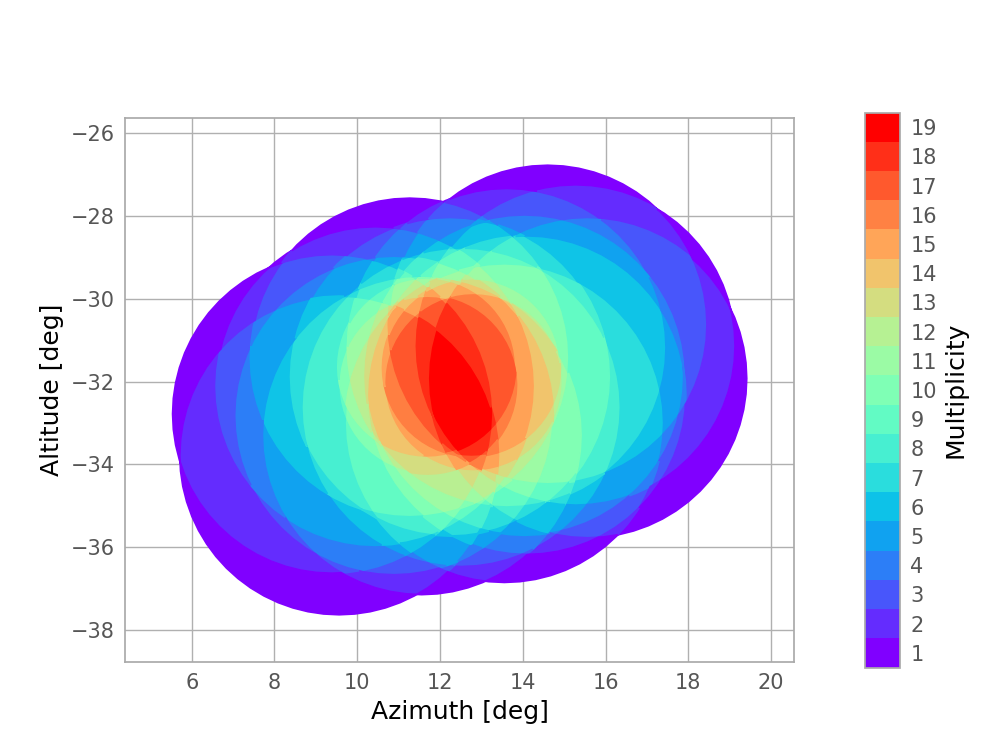

In [36]:
overlaps = np.array(list(dict_count_overlaps.values()))
#print(len(res), len(overlaps_nocut))
eff_hfov = []
eff_overlaps=[]
eff_res=[]
for i,patchsky in enumerate(res):
    
    if overlaps[i]>=cut:
        eff_overlaps.append(overlaps[i])
        eff_hfov.append(patchsky.area)
        eff_res.append(res[i])

    

eff_res=np.array(eff_res)
eff_hfov= np.array(eff_hfov) 
eff_overlaps= np.array(eff_overlaps) 
average_overlap = np.average(eff_overlaps, weights=eff_hfov)



cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
minmax = []

bounds = np.arange(max_multiplicity + 1) + 1
fig = plt.figure()
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

fig.subplots_adjust(top=0.85)

    
for pol_id, pol in enumerate (eff_res):
    colore = eff_overlaps[pol_id]
    ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
    )


norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                label='Multiplicity')
cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5)
cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)
ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(np.min(final_pointing.az.value)-5, np.max(final_pointing.az.value)+5)
ax.set_ylim(np.min(final_pointing.alt.value)-5, np.max(final_pointing.alt.value)+5)
ax.set_aspect(1)
#plt.savefig("multiplicity_plot_div{}.png".format(div))
plt.show()


In [37]:
print (eff_hfov.sum(), average_overlap)

113.05171518444408 6.681607000606485


In [38]:
star_altaz=star.transform_to(new_frame)

details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{eff_hfov.sum()},{average_overlap}True')
append_new_line(f'plots/fov_evolution.txt', details)


In [39]:
array.pointing['alt']

<Quantity -32.11103004 deg>

In [40]:
array.hFoV()

<Quantity 112.40085274 deg2>

In [41]:
array.hFoV(m_cut=cut).value-eff_hfov.sum()

-0.6508624475196569

In [42]:

details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{array.hFoV().value},False')
append_new_line(f'plots/fov_evolution.txt', details)


<IPython.core.display.Javascript object>


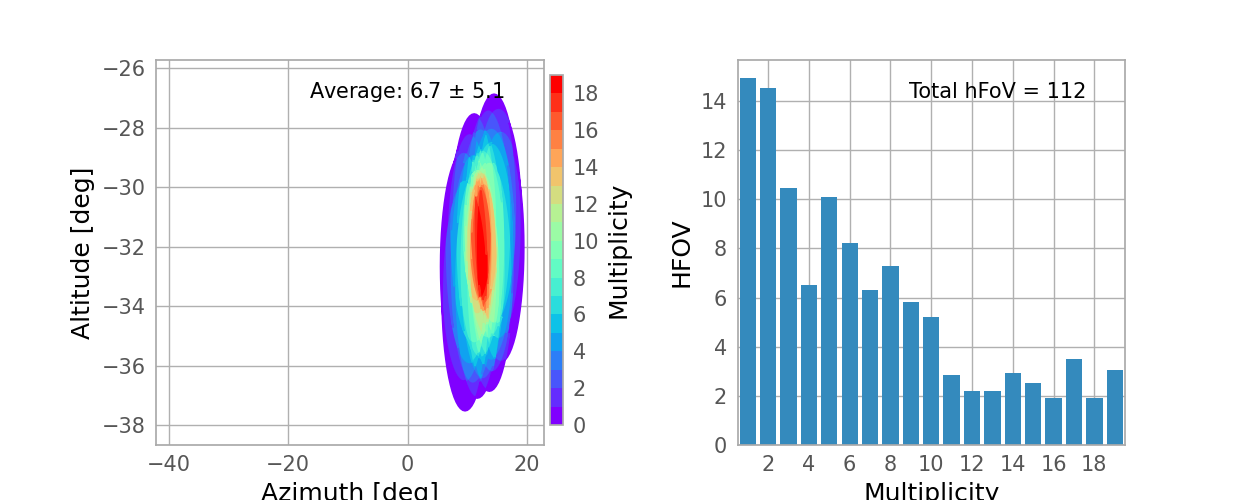

In [43]:
array.multiplicity_plot()

## Get parameters (hFoV, alt, and m) as a function of time

In [44]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


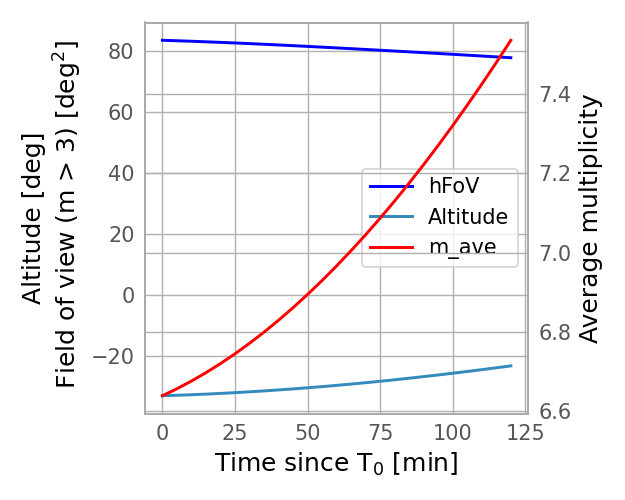

In [45]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
plt.savefig(f'evolution_{name}_{time}_{div}.png')

<IPython.core.display.Javascript object>


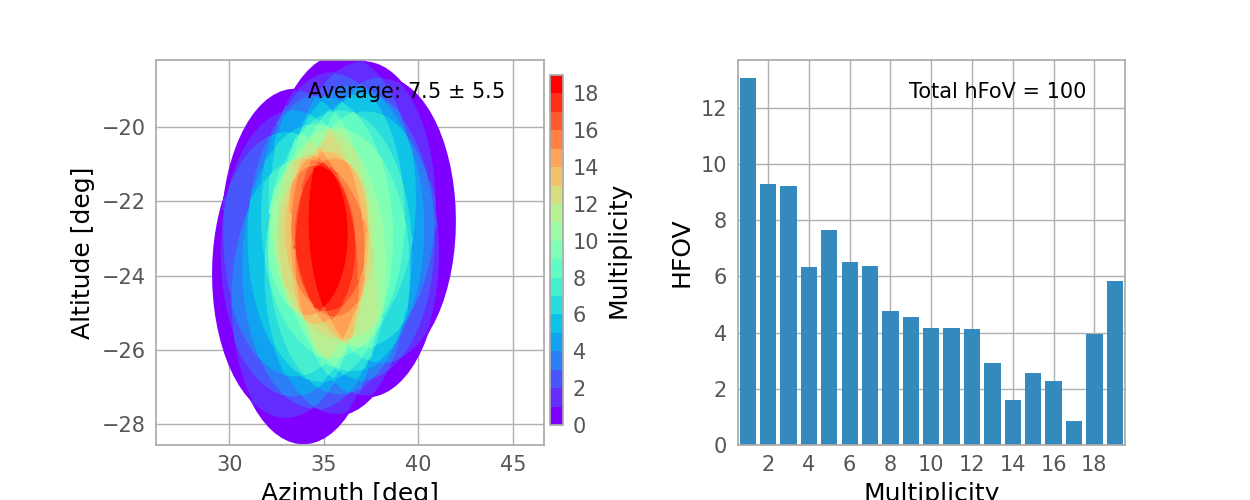

Text(0.5, 0, 'Multiplicity')

In [46]:
m, overlaps, geoms = array.hFoV(full_output=True)
max_m = int(array.size_of_array)
ave_multi = np.average(m[:,0], weights=m[:,1])
var_multi = np.average((m[:,0]-ave_multi)**2, weights=m[:,1])


fig = plt.figure(figsize=(10, 4))

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))
bounds = np.arange(max_m + 1) + 1

gs  = mpl.gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax_cb = fig.add_axes([0.44,0.15,0.01,0.7])
ax_mul = plt.subplot(gs[1])

plt.subplots_adjust(wspace=0.5)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))

minmax = []
for i, pol in enumerate(geoms):
    colore = int(overlaps[i])
    pol_map = mapping(pol)
    ax.add_patch(PolygonPatch(pol_map, color=color_list[colore-1]))
    patch_az = np.asarray(pol_map['coordinates'])[0][:][0]
    minmax.append([min(patch_az), max(patch_az)])
minmax = np.asarray(minmax)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                 label='Multiplicity')
cb1.set_ticks(np.arange(0, max_m+1, step=2) + 1)
cb1.set_ticklabels(np.arange(0, max_m+1, step=2))

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(np.min(minmax[:,0])-5, np.max(minmax[:,1])+5)
ax.set_ylim(np.min(array.table["alt"])-5, np.max(array.table["alt"])+5)

ax.text(0.9, 0.9, r"Average: {:.1f} $\pm$ {:.1f}".format(ave_multi, np.sqrt(var_multi)),
        ha="right", transform=ax.transAxes)

ax_mul.bar(m[:,0], m[:,1])
ax_mul.text(0.9, 0.9, "Total hFoV = {:.0f}".format(sum(m[:,1][m[:,0]>=cut])), ha="right", transform=ax_mul.transAxes)
ax_mul.set_xticks(np.arange(0, max_m+1, step=2))
ax_mul.set_xlim(0.5, max_m+0.5)
ax_mul.set_ylabel('HFOV')
ax_mul.set_xlabel('Multiplicity')


In [47]:
minmax[:,0]

array([-22.97326163, -23.60202412, -23.60202412, -24.558825  ,
       -24.558825  , -24.69591041, -24.69591041, -24.76657745,
       -24.76657745, -25.11895385, -25.11895385, -25.09455633,
       -25.09455633, -24.95909043, -24.95909043, -24.80885959,
       -24.80885959, -24.68185701, -24.68185701, -23.32653772,
       -23.32653772, -23.2075465 , -23.2075465 , -21.66346826,
       -21.09556667, -21.09556667, -21.02366658, -21.02366658,
       -20.94154513, -20.94154513, -20.90465599, -20.90465599,
       -20.84939311, -20.84939311, -20.94564416, -20.94564416,
       -20.97542557, -20.97542557, -21.42335245, -23.16935879,
       -24.73746543, -25.28473422, -25.28473422, -25.27135184,
       -25.27135184, -25.22688873, -25.22688873, -25.20412132,
       -25.20412132, -24.92554269, -24.92554269, -24.80183593,
       -24.80183593, -23.40184322, -23.40184322, -22.0819863 ,
       -22.0819863 , -21.42043946, -21.42043946, -21.23681193,
       -21.23681193, -21.21313548, -21.04618535, -21.02